<a href="https://colab.research.google.com/github/dineshb302/TERM2/blob/MLU_SHJ/ML_USL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Upload from GITHUB

In [5]:
url = 'https://raw.githubusercontent.com/dineshb302/TERM2/7143f5150720b80d83441c9939b6eca6214ef591/Champo%20Carpets%20V1.csv'
df = pd.read_csv(url)
print(df.head())


   OrderiD  Item_Id CustomerCode CountryName customer_country  QtyRequired  \
0        1        5          H-1         USA           H-1USA            6   
1        1       26          H-1         USA           H-1USA            6   
2        1       17          H-1         USA           H-1USA            7   
3        1      496          H-1         USA           H-1USA            7   
4        1       30          H-1         USA           H-1USA            5   

   TotalArea  Amount    ITEM_NAME            QualityName         DesignName  \
0     128.25   769.5  HAND TUFTED  TUFTED 30C HARD TWIST  OLD LONDON [3715]   
1     117.00   702.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   
2      88.00   616.0  HAND TUFTED             TUFTED 60C    WEMBLY [CC-206]   
3      88.00   616.0  HAND TUFTED             TUFTED 60C    SYMPHONY [8900]   
4     117.00   585.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   

     ColorName ShapeName  
0  GREEN/IVORY       REC  
1 

# Feature Engineering to create two variables
1. Unique product attributes foring Product Category
2. Price of the Price Category

In [6]:
df['Product Category'] = df['ITEM_NAME']+ ' | ' + df['QualityName'] + ' | '+ df['DesignName']+ ' | '+ df['ColorName']+ ' | ' + df['ShapeName']
df['Price'] = df['Amount']/df['QtyRequired']

print(df.head())


   OrderiD  Item_Id CustomerCode CountryName customer_country  QtyRequired  \
0        1        5          H-1         USA           H-1USA            6   
1        1       26          H-1         USA           H-1USA            6   
2        1       17          H-1         USA           H-1USA            7   
3        1      496          H-1         USA           H-1USA            7   
4        1       30          H-1         USA           H-1USA            5   

   TotalArea  Amount    ITEM_NAME            QualityName         DesignName  \
0     128.25   769.5  HAND TUFTED  TUFTED 30C HARD TWIST  OLD LONDON [3715]   
1     117.00   702.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   
2      88.00   616.0  HAND TUFTED             TUFTED 60C    WEMBLY [CC-206]   
3      88.00   616.0  HAND TUFTED             TUFTED 60C    SYMPHONY [8900]   
4     117.00   585.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   

     ColorName ShapeName                                

In [7]:
print(df.describe())

            OrderiD       Item_Id   QtyRequired     TotalArea         Amount  \
count  13135.000000  13135.000000  13135.000000  13135.000000   13135.000000   
mean    3075.336962  14528.683746     44.460601     44.731370    2392.040164   
std     2107.731646  13183.139544    228.749535     50.099597   16832.091080   
min        1.000000      1.000000      1.000000      0.040000       0.000000   
25%     1219.500000   3023.000000      3.000000      5.800000     163.200000   
50%     2934.000000   8631.000000      8.000000     24.000000     590.625000   
75%     4630.000000  26713.000000     20.000000     80.000000    1540.000000   
max     7548.000000  46701.000000   6400.000000   1024.000000  599719.680000   

              Price  
count  13135.000000  
mean     164.969527  
std      771.264070  
min        0.000000  
25%       16.884000  
50%       72.000000  
75%      175.320000  
max    21418.560000  


# Validation of Data Uniqueness

In [10]:
Price_unique = df['TotalArea'].nunique()
print("Unique Prices:", Price_unique)

Item_unique = df['Item_Id'].nunique()
print("Unique Items:", Item_unique)

Order_unique = df['OrderiD'].nunique()
print("Unique Order:", Order_unique)

Prodcat_unique = df['Product Category'].nunique()
print("Unique Order:", Prodcat_unique)


Unique Prices: 300
Unique Items: 5875
Unique Order: 2412
Unique Order: 1777


# Product Attribute & Customer Analysis
1.Top 10 Carpet Designs

2.Top 10 Carpet Colors

3.Top 10 Customers

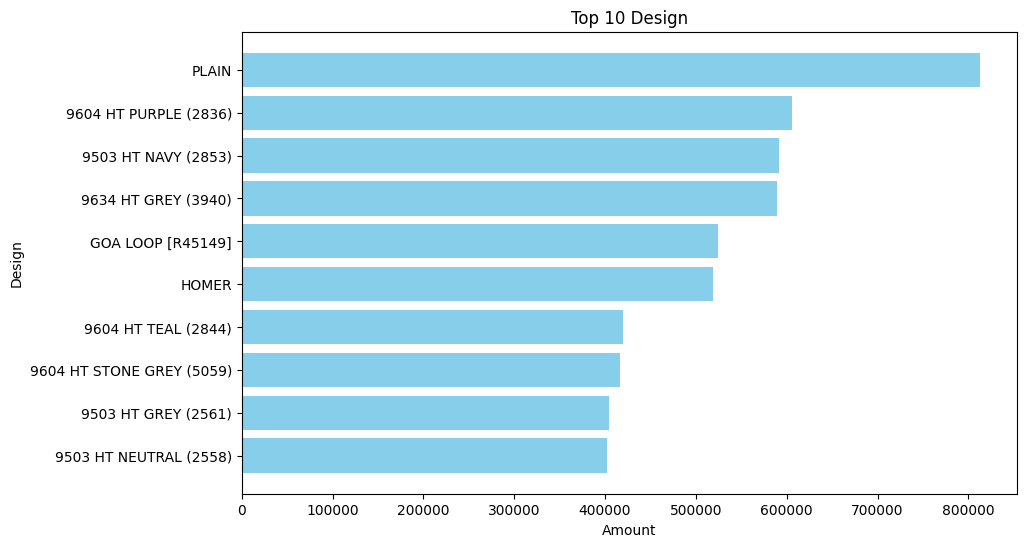

In [11]:
Design_df = df.groupby('DesignName', as_index=False).agg({'Amount': 'sum'})
top_design = Design_df.sort_values(by= 'Amount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_design['DesignName'], top_design['Amount'], color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Design')
plt.title('Top 10 Design')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

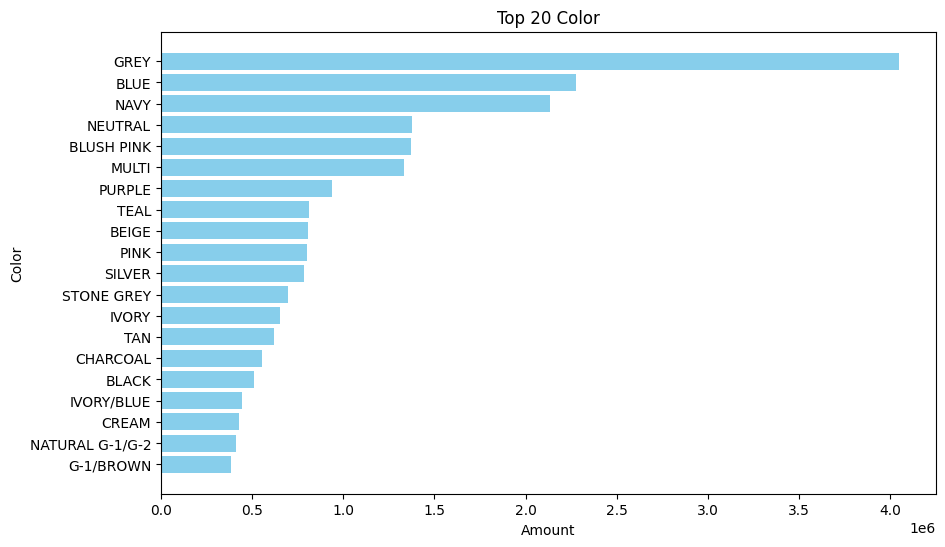

In [15]:
color_df = df.groupby('ColorName', as_index=False).agg({'Amount': 'sum'})
top_color = color_df.sort_values(by= 'Amount', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_color['ColorName'], top_color['Amount'], color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Color')
plt.title('Top 20 Color')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

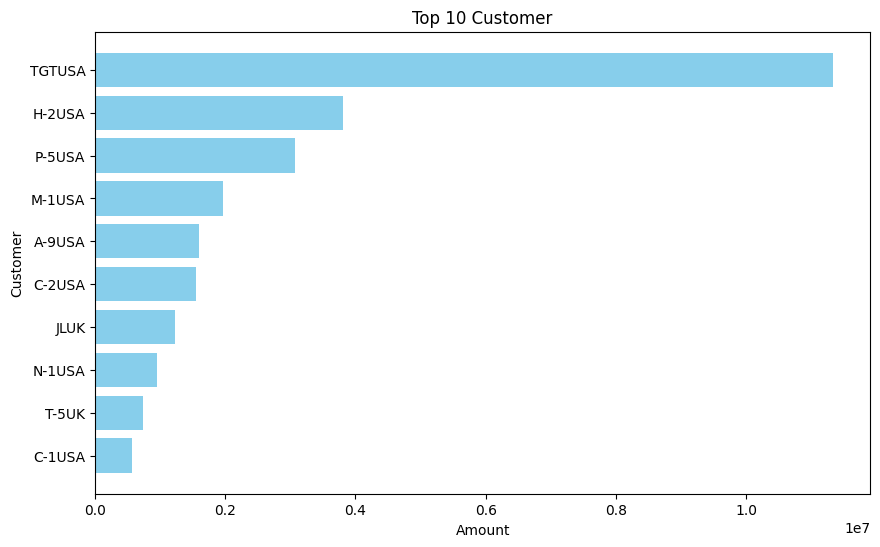

In [14]:
cust_df = df.groupby('customer_country', as_index=False).agg({'Amount': 'sum'})
top_cust = cust_df.sort_values(by= 'Amount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_cust['customer_country'], top_cust['Amount'], color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Customer')
plt.title('Top 10 Customer')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

# Amount , Quantity ordered and Price Relationships - Bivariate Analysis

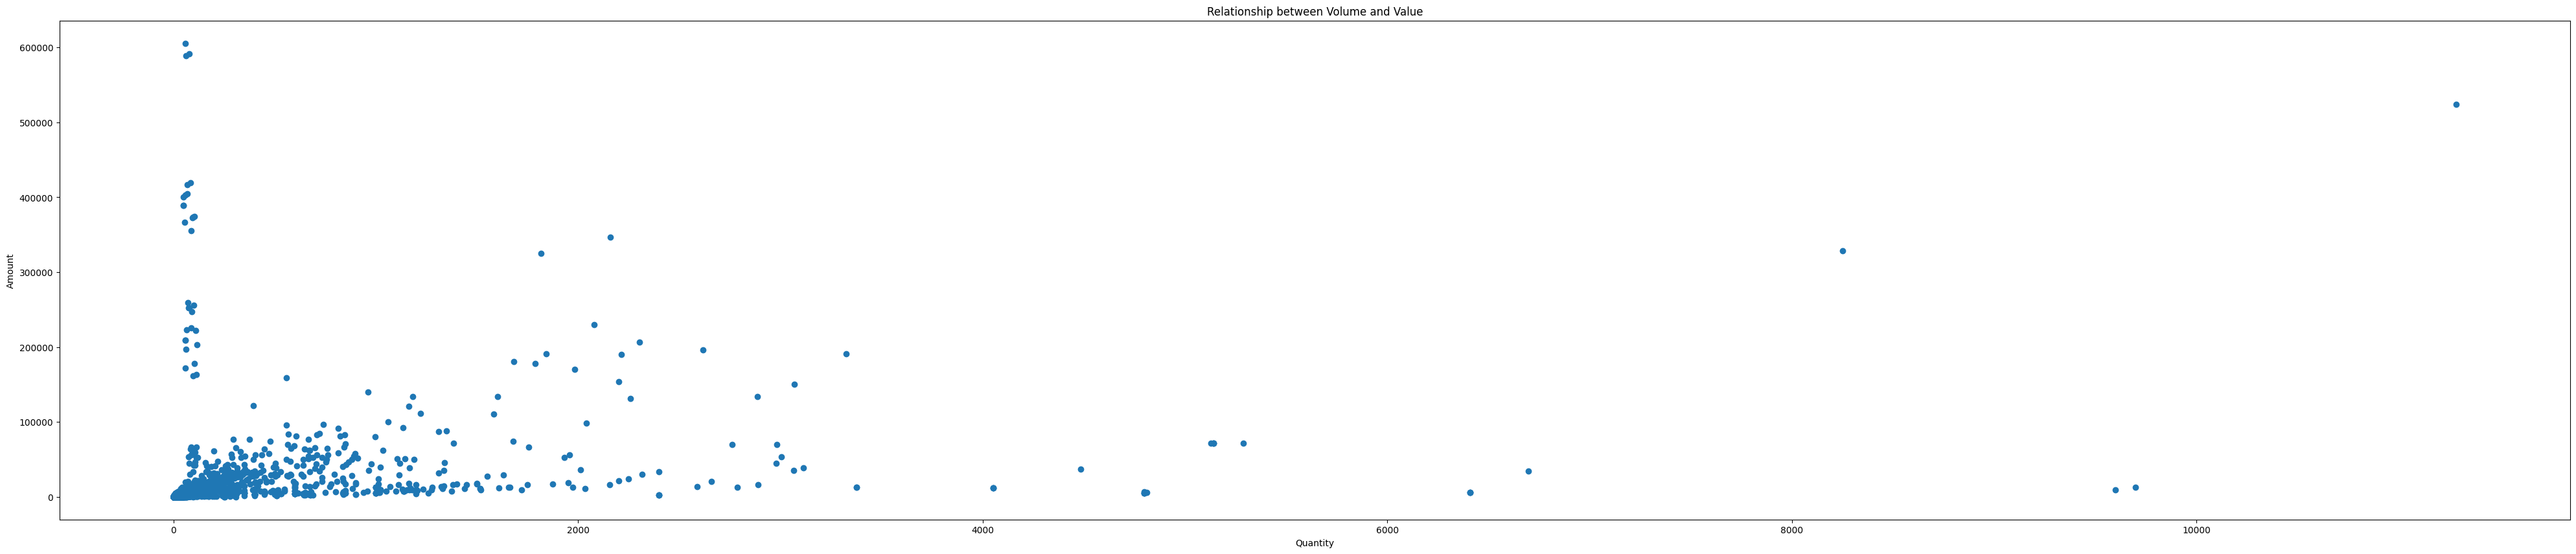

In [8]:
agg_df = df.groupby('Product Category', as_index=False).agg({'Amount': 'sum','QtyRequired':'sum'})


plt.figure(figsize=(50, 10))
plt.scatter(agg_df['QtyRequired'], agg_df['Amount'])

# Adding titles and labels
plt.title('Relationship between Volume and Value')
plt.xlabel('Quantity')
plt.ylabel('Amount')

# Display the chart
plt.show()

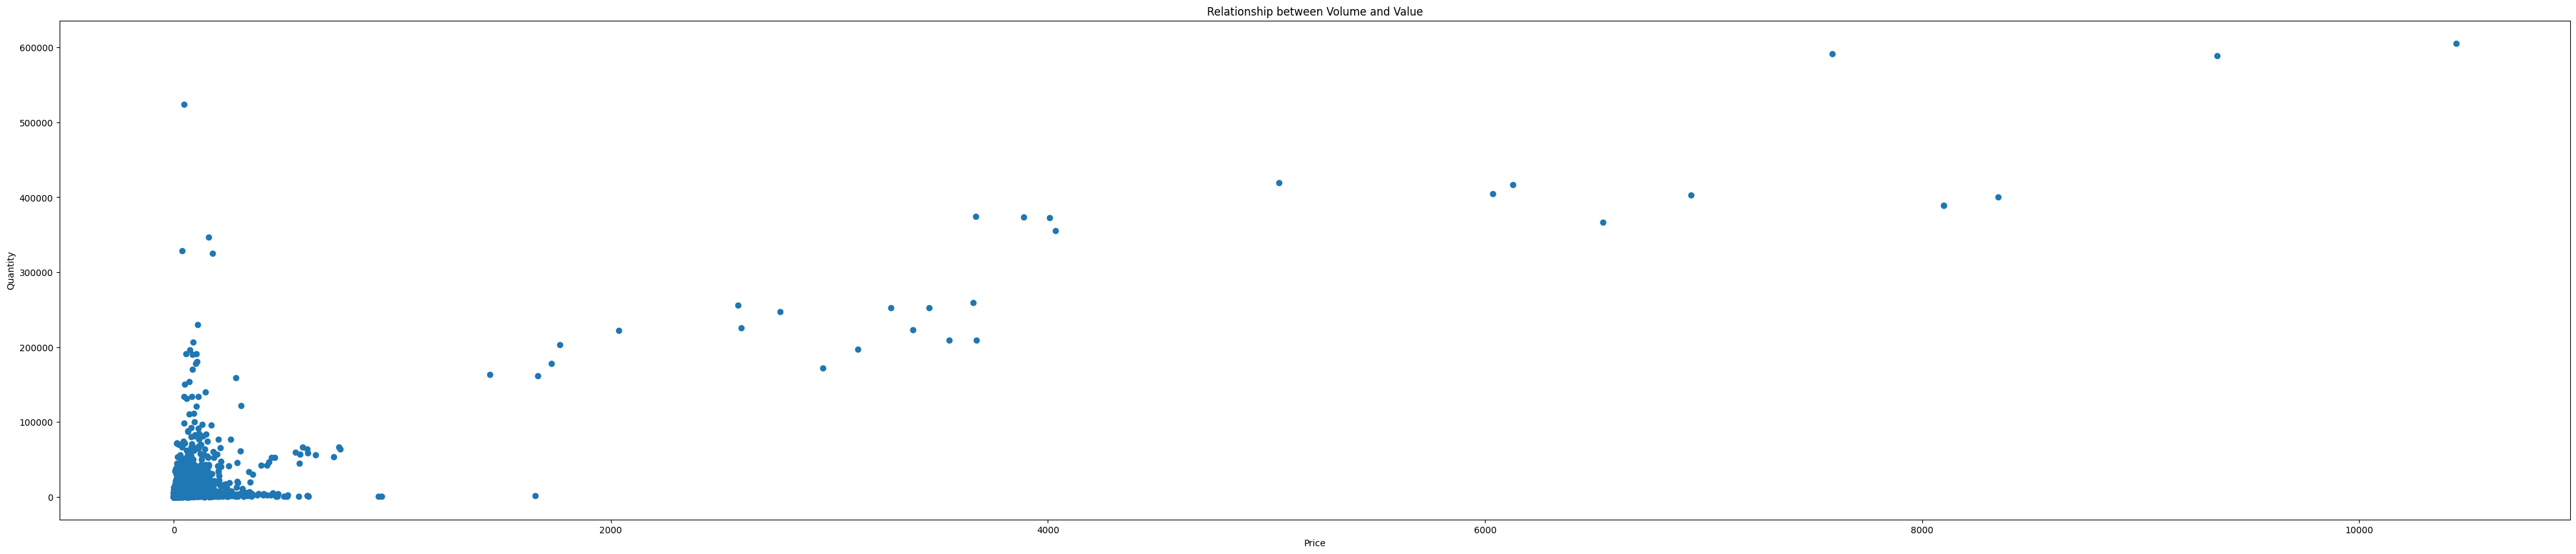

In [14]:
agg_df = df.groupby(['Product Category','ColorName'], as_index=False).agg({'Amount': 'sum','QtyRequired':'sum'})
agg_df['Price'] = agg_df['Amount']/agg_df['QtyRequired']

plt.figure(figsize=(50, 10))
plt.scatter(agg_df['Price'], agg_df['Amount'])

# Adding titles and labels
plt.title('Relationship between Volume and Value')
plt.xlabel('Price')
plt.ylabel('Quantity')

plt.show()

# Price Bin Analysis

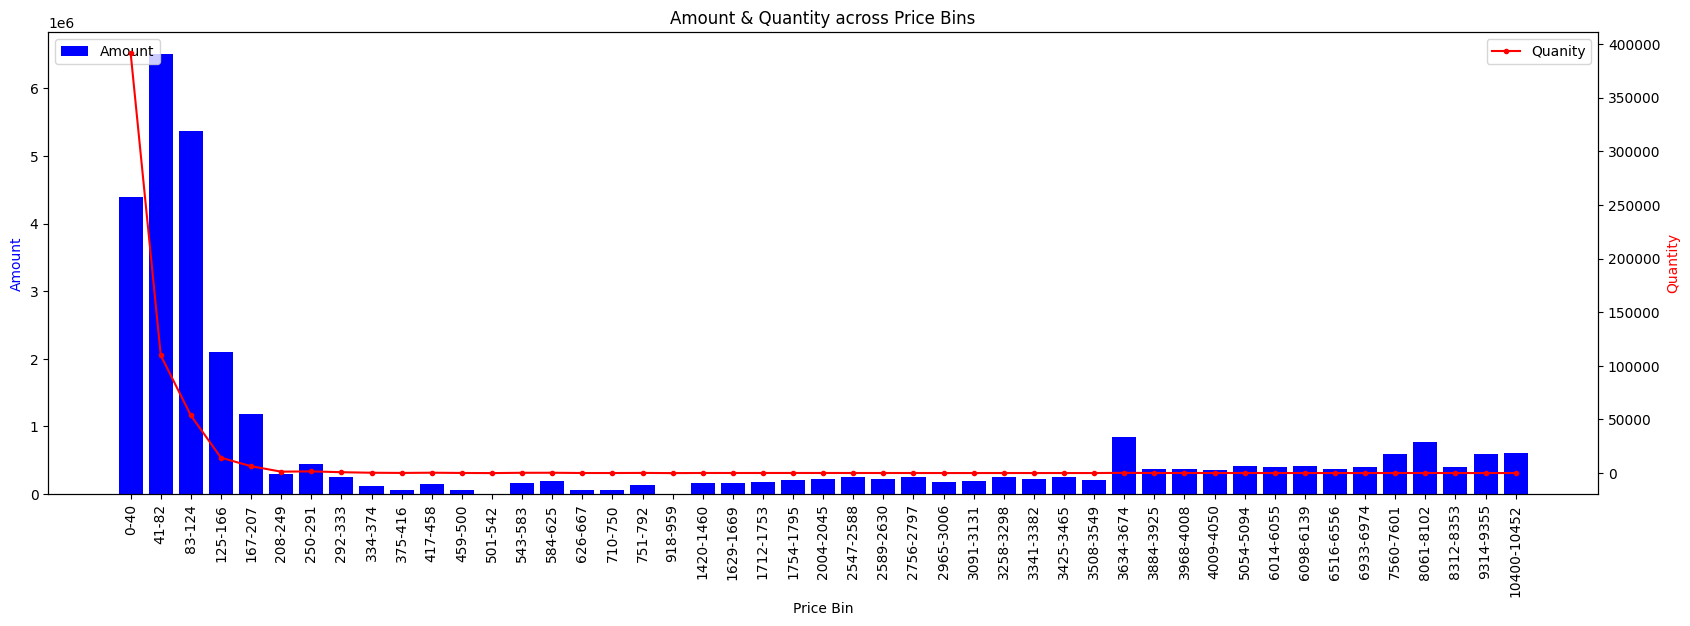

In [9]:
# Aggrgated dataframe to derive the Price Bin
agg_df = df.groupby('Product Category', as_index=False).agg({'Amount': 'sum','QtyRequired':'sum'})
agg_df['Price'] = agg_df['Amount']/agg_df['QtyRequired']

# Number of bins
n_bins = 250

# Function to create and label bins
def create_labelled_bins( dataframe, column, n_bins):
    # Create bins
    agg_df['Binned'], bins = pd.cut(agg_df['Price'], bins=n_bins, retbins=True, labels=False, right=False)

    # Generate bin labels (e.g., "0-199", "200-399", etc.)
    bin_labels = [f"{int(bins[i])}-{int(bins[i+1])-1}" for i in range(len(bins)-1)]

    # Map bin numbers to labels
    bin_label_map = {i: label for i, label in enumerate(bin_labels)}
    agg_df['BinLabel'] = agg_df['Binned'].map(bin_label_map)

    return dataframe, bin_label_map

# Apply to our dataframe
agg_df, bin_label_map = create_labelled_bins(agg_df, 'Price', n_bins)


price_df = agg_df.groupby(['BinLabel','Binned'], as_index=False).agg({'Amount': 'sum', 'QtyRequired': 'sum'})
price_df = price_df.sort_values(by='Binned')
# print(price_df)

#plotting data

fig, ax1 = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90)
ax1.bar(price_df['BinLabel'], price_df['Amount'], color='b', label='Amount')

ax2 = ax1.twinx()
ax2.plot(price_df['BinLabel'], price_df['QtyRequired'], color='r', marker='.', label='Quanity')

ax1.set_xlabel('Price Bin')
ax1.set_ylabel('Amount', color='b')
ax2.set_ylabel('Quantity', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Amount & Quantity across Price Bins')

plt.show()


# Customer performance by Quantity & Amount across countries

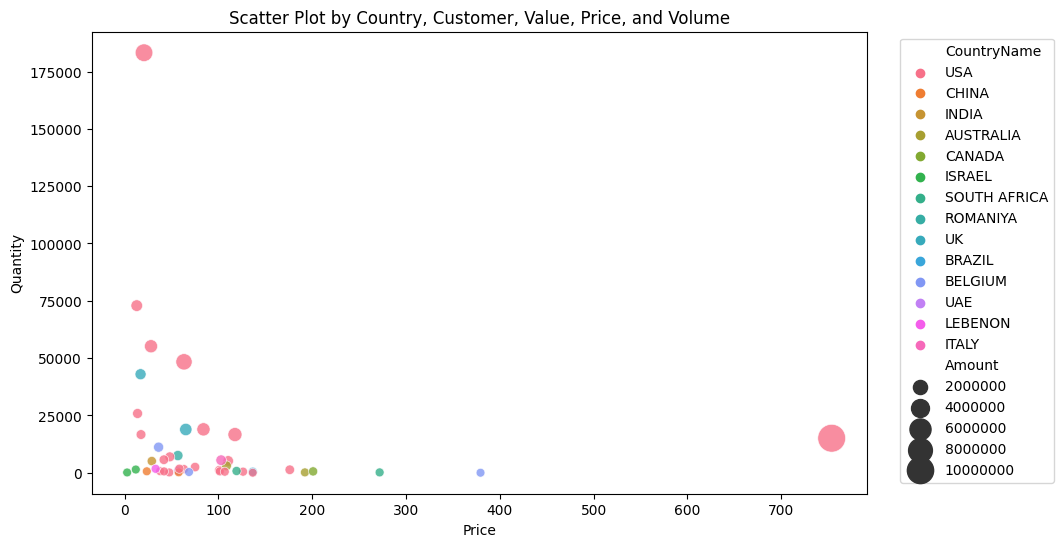

In [10]:
agg_df = df.groupby(['CustomerCode','CountryName'], as_index=False).agg({'Amount': 'sum', 'QtyRequired': 'sum'})
agg_df['Price'] = agg_df['Amount']/agg_df['QtyRequired']

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=agg_df, x='Price', y='QtyRequired',
                          size='Amount', hue='CountryName',
                          sizes=(40, 400), alpha=0.8, legend='brief')

# Adjust the legend for better readability
scatter.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot by Country, Customer, Value, Price, and Volume')

# Show the plot
plt.show()

# Customer Share of Business & Index

In [24]:
agg_df = df.groupby('customer_country', as_index=False).agg({'Amount': 'sum', 'QtyRequired': 'sum'})

# Step 1: Aggregate total value and volume by country
share_df = agg_df.groupby('customer_country').sum()

# Step 2: Calculate total value and volume in the dataset
total_amount = agg_df['Amount'].sum()
total_quantity = agg_df['QtyRequired'].sum()

# Step 3: Calculate share for each country
share_df['Share of Total Amount'] = (share_df['Amount'] / total_amount) * 100
share_df['Share of Total Quantity'] = (share_df['QtyRequired'] / total_quantity) * 100
share_df['Index'] = share_df['Share of Total Amount']/share_df['Share of Total Quantity']


# Step 4: Format the results (optional)
share_df = share_df.drop(columns=['Amount', 'QtyRequired'])
share_df = share_df.sort_values(by='Share of Total Amount', ascending=False)

share_df['Share of Total Amount'] = share_df['Share of Total Amount'].round(2)
share_df['Share of Total Quantity'] = share_df['Share of Total Quantity'].round(2)
share_df['Index'] = share_df['Index'].round(1)

# Display the results

# Use Seaborn's color palette for styling
cm = sns.light_palette("white", as_cmap=True)

# Using Pandas style with Seaborn's color map
styled_table = share_df.style.background_gradient(cmap=cm)
styled_table


,Share of Total Amount,Share of Total Quantity,Index
customer_country,,,
TGTUSA,36.100000,2.580000,14.000000
H-2USA,12.110000,31.370000,0.400000
P-5USA,9.760000,8.280000,1.200000
M-1USA,6.240000,2.850000,2.200000
A-9USA,5.070000,3.240000,1.600000
C-2USA,4.960000,9.450000,0.500000
JLUK,3.920000,3.230000,1.200000
N-1USA,3.020000,12.480000,0.200000
T-5UK,2.340000,7.360000,0.300000
